# TFM Borja Simancas Ruesgas
## Desarrollo de un sistema de identificación mediante técnicas de reconocimiento facial

1) Instalación de la librería face_recognition: https://face-recognition.readthedocs.io/en/latest/


In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 1.3MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566174 sha256=1ae501b51962384f1427dbe46df9a78b00976a57c3f13a5cd5bd0ecc6724a4a3
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [10]:
!pip install ImageHash

     |████████████████████████████████| 296kB 4.9MB/s 


2) Importación de librerías

In [0]:
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

3) Montaje de la unidad de Google Drive para el almacenamiento y la obtención de la información

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


4) Creación de la estructura de ficheros en Google Drive (solo es necesario ejecutarlo la primera vez)

In [0]:
import os
os.chdir('/content/gdrive/My Drive/') 
!mkdir examples
!mkdir output

mkdir: cannot create directory ‘examples’: File exists
mkdir: cannot create directory ‘output’: File exists


**ENCODING FACES**

5) El primer paso antes de poder reconocer caras en imágenes o en vídeos es cuantificar las caras del dataset de entrenamiento. Es importante destacar que no se está haciendo el entrenamiento de una red desde cero. El uso de la librería face_recognition permite utilizar una red pre-entrenada para crear vectores de 128 valores por cada una de las caras, de tal manera que cada una de las imágenes queda codificada por un vector de 128 valores mediante el uso de una red convolucional (CNN)

In [0]:
# Ruta del dataset de entrada de imágenes
DATASET = "/content/gdrive/My Drive/dataset"
print("Cuantificando imágenes...")
rutaImagenes = list(paths.list_images(DATASET))
 
# Inicialización de la lista de las caras conocidas junto a sus codificaciones
encodingsConocidos = []
nombresConocidos = []

Cuantificando imágenes...


In [0]:
# Bucle sobre las imágenes
for (i, imagePath) in enumerate(rutaImagenes):
	# Extracción del nombre de la persona de la imagen
	print("Procesando la imagen {}/{}".format(i + 1, len(rutaImagenes)))
	nombre = imagePath.split(os.path.sep)[-2]
 
	# Carga de la imagen y conversión a RGB
	imagen = cv2.imread(imagePath)
	rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
  
  # Detección de las coordinadas X e Y de las cajas que enmarcan la cara de una imagen mediante el uso del modelo CNN
	caja = face_recognition.face_locations(rgb,model='cnn')
 
	# Calculo de la codificación en vector de la imagen
	encodings = face_recognition.face_encodings(rgb, caja)
 
	# Bucle sobre la codificación
	for encoding in encodings:
		# Se añade cada codificación y cada nombre a la lista inicializada en el paso previo
		encodingsConocidos.append(encoding)
		nombresConocidos.append(nombre)

Procesando la imagen 1/160
Procesando la imagen 2/160
Procesando la imagen 3/160
Procesando la imagen 4/160
Procesando la imagen 5/160
Procesando la imagen 6/160
Procesando la imagen 7/160
Procesando la imagen 8/160
Procesando la imagen 9/160
Procesando la imagen 10/160
Procesando la imagen 11/160
Procesando la imagen 12/160
Procesando la imagen 13/160
Procesando la imagen 14/160
Procesando la imagen 15/160
Procesando la imagen 16/160
Procesando la imagen 17/160
Procesando la imagen 18/160
Procesando la imagen 19/160
Procesando la imagen 20/160
Procesando la imagen 21/160
Procesando la imagen 22/160
Procesando la imagen 23/160
Procesando la imagen 24/160
Procesando la imagen 25/160
Procesando la imagen 26/160
Procesando la imagen 27/160
Procesando la imagen 28/160
Procesando la imagen 29/160
Procesando la imagen 30/160
Procesando la imagen 31/160
Procesando la imagen 32/160
Procesando la imagen 33/160
Procesando la imagen 34/160
Procesando la imagen 35/160
Procesando la imagen 36/160
P

In [0]:
# Almacenamiento de las codificaciones de la imagenes en Google Drive
print("Almacenando codificaciones...")
data = {"encodings": encodingsConocidos, "names": nombresConocidos}
f = open("/content/gdrive/My Drive/encodings.pickle", "wb")
f.write(pickle.dumps(data))
f.close()

Almacenando codificaciones...


Se van a implementar tres aproximaciones a la hora de realizar la detección facial:


*   Detección facial en imágenes.
*   Detección facial en vídeos.
*   Detección facial en imagen capturada a través de la webcam.





**1) RECONOCIMIENTO FACIAL IMÁGENES**

In [0]:
import argparse
import pickle
import cv2

6) Una vez convertidas las imágenes del dataset el siguiente paso es reconocer una imagen introducida como input para comprobar el funcionamiento del modelo. 
En primer lugar es necesario codificar la imagen a reconocer de manera análoga al paso anterior.

In [0]:
# Carga de las codificaciones de imágenes conocidas
print("Carga de codificaciones...")
data = pickle.loads(open("/content/gdrive/My Drive/encodings.pickle", "rb").read())
 
# Carga de la imagen y conversion de BGR a RGB
imagen = cv2.imread("/content/gdrive/My Drive/examples/oncetitular.jpg")
rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 
# Detección de las coordinadas X e Y de las cajas que enmarcan la cara de una imagen mediante el uso del modelo CNN
print("Reconociendo caras...")
cajas = face_recognition.face_locations(rgb, model='cnn')
encodings = face_recognition.face_encodings(rgb, cajas)
# Inicialización de la lista para almacenamiento de las imágenes detectadas
nombres = []

Carga de codificaciones...
Reconociendo caras...


Mediante el uso de la distancia Euclidea se comparan las codificaciones de las caras conocidas frente a la cara introducida como input. Si dicha distancia está por debajo de un determinado umbral, se asume que las caras son las mismas.

In [0]:
# Bucle sobre las codificaciones de imágenes
for encoding in encodings:
	# Comparación de las imágenes conocidas frente a la imágen input
	coincidencias = face_recognition.compare_faces(data["encodings"], encoding)
	nombre = "Desconocido"
  
  # Comprobación para ver si existe coincidencia
	if True in coincidencias:
		# Se contabilizan el número de coincidencias por cara
		matchedIdxs = [i for (i, b) in enumerate(coincidencias) if b]
		counts = {}
 
		# Se actualiza el contador de cada cara reconocida
		for i in matchedIdxs:
			nombre = data["names"][i]
			counts[nombre] = counts.get(nombre, 0) + 1
 
		# Se determina que la cara reconocida es aquella con mayor número de votos
		nombre = max(counts, key=counts.get)
	
	# Se actualiza la lista final con los nombres de las imágenes
	nombres.append(nombre)

7) Por último, se visualiza los nombres de las caras detectadas en la imagen

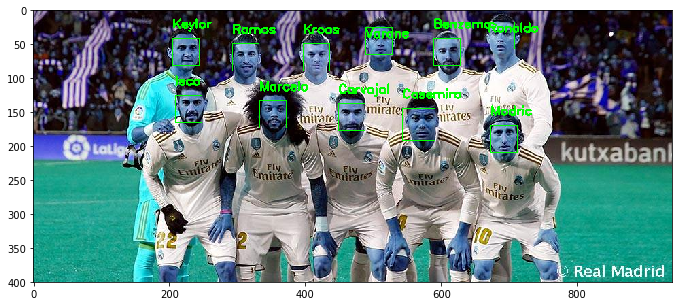

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

# Bucle sobre las caras reconocidas
for ((top, right, bottom, left), nombre) in zip(cajas, nombres):
	# Se dibuja el nombre sobre la imagen
	cv2.rectangle(imagen, (left, top), (right, bottom), (0, 255, 0), 1)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(imagen, nombre, (left, y), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0, 255, 0), 2)
 
plt.figure(figsize = (200,5))
plt.imshow(imagen)
plt.show()

**2) RECONOCIMIENTO FACIAL VIDEO**

In [0]:
from imutils.video import VideoStream
import face_recognition
import argparse
import imutils
import pickle
import time
import cv2

6) Una vez convertidas las imágenes del dataset el siguiente paso es reconocer un vídeo introducido como input para comprobar el funcionamiento del modelo. 
En primer lugar es necesario codificar el video a reconocer de manera análoga a los pasos anteriores.

In [0]:
# Carga de las codificaciones de imágenes conocidas
print("Carga de codificaciones...")
data = pickle.loads(open("/content/gdrive/My Drive/encodings.pickle", "rb").read())

# Carga del vídeo e inicialización del cursor de vídeo.
print("Procesando vídeo...")
stream = cv2.VideoCapture("/content/gdrive/My Drive/video2.mp4")
writer = None

Carga de codificaciones...
Procesando vídeo...


La detección facial se realiza de manera análoga al primer enfoque, con la excepcion de que se tratan frames de vídeo en lugar de imágenes.

In [0]:
# Bucle sobre los frames del vídeo
while True:
	# Lectura de frame
	(captura, frame) = stream.read()

	# Si no se capturan más frames se ha llegado al final del vídeo
	if not captura:
		break

  # Conversión del frame de BGR a RGB y redimensionamiento del mismo
	rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
	rgb = imutils.resize(frame, width=750)
	r = frame.shape[1] / float(rgb.shape[1])

	# Detección de las coordinadas X e Y de las cajas que enmarcan la cara de una imagen mediante el uso del modelo CNN
	cajas = face_recognition.face_locations(rgb, model='cnn')
	encodings = face_recognition.face_encodings(rgb, cajas)
	nombres = []

	# Bucle sobre las codificaciones de imágenes
	for encoding in encodings:
		# Comparación de las imágenes conocidas frente a la imágen input
		coincidencias = face_recognition.compare_faces(data["encodings"], encoding)
		nombre = "Desconocido"

		# Comprobación para ver si existe coincidencia
		if True in coincidencias:
			# Se identifican los índices del array coincidentes
			matchedIdxs = [i for (i, b) in enumerate(coincidencias) if b]
			counts = {}

			# Se contabilizan cada una de las coincidencias
			for i in matchedIdxs:
				nombre = data["names"][i]
				counts[nombre] = counts.get(nombre, 0) + 1

			# Se determina que la cara reconocida es aquella con mayor número de votos
			nombre = max(counts, key=counts.get)
		
		# Se actualiza la lista final con los nombres de las imágenes
		nombres.append(nombre)

	# Bulce sobre las caras reconocidas
	for ((top, right, bottom, left), nombre) in zip(cajas, nombres):
		# Reescalado de las coordenadas de la cara
		top = int(top * r)
		right = int(right * r)
		bottom = int(bottom * r)
		left = int(left * r)

		# Se dibuja el nombre de la cara en la imagen
		cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
		y = top - 15 if top - 15 > 15 else top + 15
		cv2.putText(frame, nombre, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

	# Escritura del vídeo
	if writer is None:
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter('/content/gdrive/My Drive/output/salida.mp4', fourcc, 24, (frame.shape[1], frame.shape[0]), True)

	# Grabado en Google Drive
	if writer is not None:
		writer.write(frame)

# Se cierra el puntero del vídeo
stream.release()

# Se comrpueba si el vídeo tiene que ser liberado
if writer is not None:
	writer.release()

**3) RECONOCIMIENTO FACIAL EN IMAGEN CAPTURA A TRAVÉS DE WEBCAM**

El proceso es el mismo que el primer planteamiento a excepción de que se incluye un código en Javascript para capturar una foto a través de la webcam.

In [0]:
from imutils.video import VideoStream
import face_recognition
import argparse
import imutils
import pickle
import time
import cv2

Definición de la función en Javascript que captura una imagen a través de la webcam y la almacena en Google Drive.

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/content/gdrive/My Drive/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Se inicializa el vídeo a través de la webcam

Inicializando la cámara web...


<IPython.core.display.Javascript object>

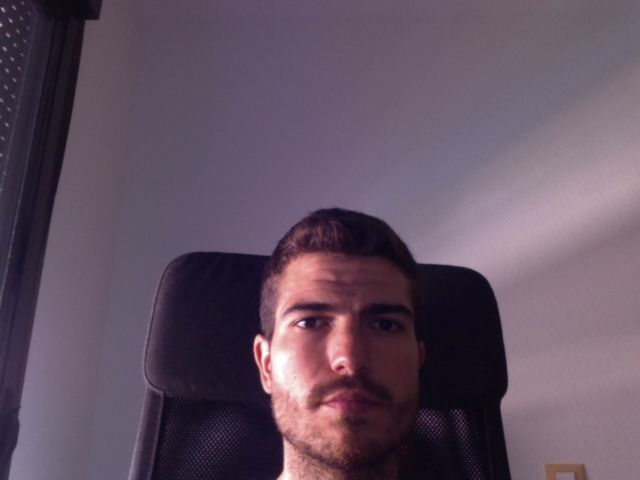

In [0]:
from IPython.display import Image

# Inicialización del puntero de la webcam
print("Inicializando la cámara web...")

try:
  vs = take_photo()
  writer = None
  time.sleep(2.0)
  # Se muestra la imagen capturada
  display(Image('/content/gdrive/My Drive/photo.jpg'))
except Exception as err:
  print(str(err))

6) Una vez convertidas las imágenes del dataset el siguiente paso es reconocer la imagen capturada mediante la webcam para comprobar el funcionamiento del modelo. 
En primer lugar es necesario codificar la imagen a reconocer de manera análoga al paso anterior.

In [0]:
# Carga de las codificaciones de imágenes conocidas
print("Carga de codificaciones...")
data = pickle.loads(open("/content/gdrive/My Drive/encodings.pickle", "rb").read())
 
# Carga de la imagen y conversion de BGR a RGB
imagen = cv2.imread("/content/gdrive/My Drive/photo.jpg")
rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Detección de las coordinadas X e Y de las cajas que enmarcan la cara de una imagen mediante el uso del modelo CNN
print("Reconociendo caras...")
cajas = face_recognition.face_locations(rgb, model='cnn')
encodings = face_recognition.face_encodings(rgb, cajas)
# Inicialización de la lista para almacenamiento de las imágenes detectadas
nombres = []

Carga de codificaciones...
Reconociendo caras...


Mediante el uso de la distancia Euclidea se comparan las codificaciones de las caras conocidas frente a la cara introducida como input. Si dicha distancia está por debajo de un determinado umbral, se asume que las caras son las mismas

In [0]:
# Bucle sobre las codificaciones de imágenes
for encoding in encodings:
	# Comparación de las imágenes conocidas frente a la imágen input
	coincidencias = face_recognition.compare_faces(data["encodings"], encoding)
	nombre = "Desconocido"
  
  # Comprobación para ver si existe coincidencia
	if True in coincidencias:
		# Se contabilizan el número de coincidencias por cara
		matchedIdxs = [i for (i, b) in enumerate(coincidencias) if b]
		counts = {}
 
		# Se actualiza el contador de cada cara reconocida
		for i in matchedIdxs:
			nombre = data["names"][i]
			counts[nombre] = counts.get(nombre, 0) + 1
 
		# Se determina que la cara reconocida es aquella con mayor número de votos
		nombre = max(counts, key=counts.get)
	
	# Se actualiza la lista final con los nombres de las imágenes
	nombres.append(nombre)

7) Por último, se visualiza los nombres de las caras detectadas en la imagen

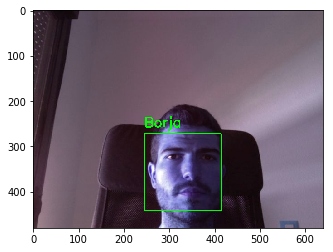

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

# Bucle sobre las caras reconocidas
for ((top, right, bottom, left), nombre) in zip(cajas, nombres):
	# Se dibuja el nombre sobre la imagen
	cv2.rectangle(imagen, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(imagen, nombre, (left, y), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 255, 0), 2)
 
plt.imshow(imagen)
plt.show()

**PRUEBAS ADICIONALES**

Se van a realizar una serie de pruebas adicionales para comprobar la robustez del modelo de detección facial

1) Imágenes con cambios significativos en la cara (gafas de sol, cambio de edad, gorras, etc.)

In [0]:
import argparse
import pickle
import cv2

# Carga de las codificaciones de imágenes conocidas
print("Carga de codificaciones...")
data = pickle.loads(open("/content/gdrive/My Drive/encodings.pickle", "rb").read())
 
# Carga de la imagen y conversion de BGR a RGB

# Prueba 1
imagen = cv2.imread("/content/gdrive/My Drive/examples/isco_gorro.jpg")

# Prueba 2
#imagen = cv2.imread("/content/gdrive/My Drive/examples/marcelo_joven.jpg")

# Prueba 3
#imagen = cv2.imread("/content/gdrive/My Drive/examples/ramos_sol.jpg")


rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 
# Detección de las coordinadas X e Y de las cajas que enmarcan la cara de una imagen mediante el uso del modelo CNN
print("Reconociendo caras...")
cajas = face_recognition.face_locations(rgb, model='cnn')
encodings = face_recognition.face_encodings(rgb, cajas)
# Inicialización de la lista para almacenamiento de las imágenes detectadas
nombres = []

# Bucle sobre las codificaciones de imágenes
for encoding in encodings:
	# Comparación de las imágenes conocidas frente a la imágen input
	coincidencias = face_recognition.compare_faces(data["encodings"], encoding)
	nombre = "Desconocido"
  
  # Comprobación para ver si existe coincidencia
	if True in coincidencias:
		# Se contabilizan el número de coincidencias por cara
		matchedIdxs = [i for (i, b) in enumerate(coincidencias) if b]
		counts = {}
 
		# Se actualiza el contador de cada cara reconocida
		for i in matchedIdxs:
			nombre = data["names"][i]
			counts[nombre] = counts.get(nombre, 0) + 1
 
		# Se determina que la cara reconocida es aquella con mayor número de votos
		nombre = max(counts, key=counts.get)
	
	# Se actualiza la lista final con los nombres de las imágenes
	nombres.append(nombre)

Carga de codificaciones...
Reconociendo caras...


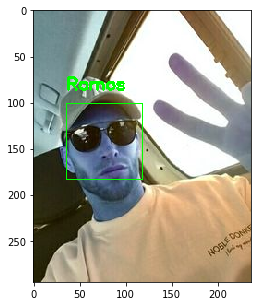

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

# Bucle sobre las caras reconocidas
for ((top, right, bottom, left), nombre) in zip(cajas, nombres):
	# Se dibuja el nombre sobre la imagen
	cv2.rectangle(imagen, (left, top), (right, bottom), (0, 255, 0), 1)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(imagen, nombre, (left, y), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0, 255, 0), 2)
 
plt.figure(figsize = (200,5))
plt.imshow(imagen)
plt.show()

2) Otra prueba adicional sería añadir ruido gaussiano a las imágenes para comprobar cuál es el umbral en el que ya no se identifican las caras

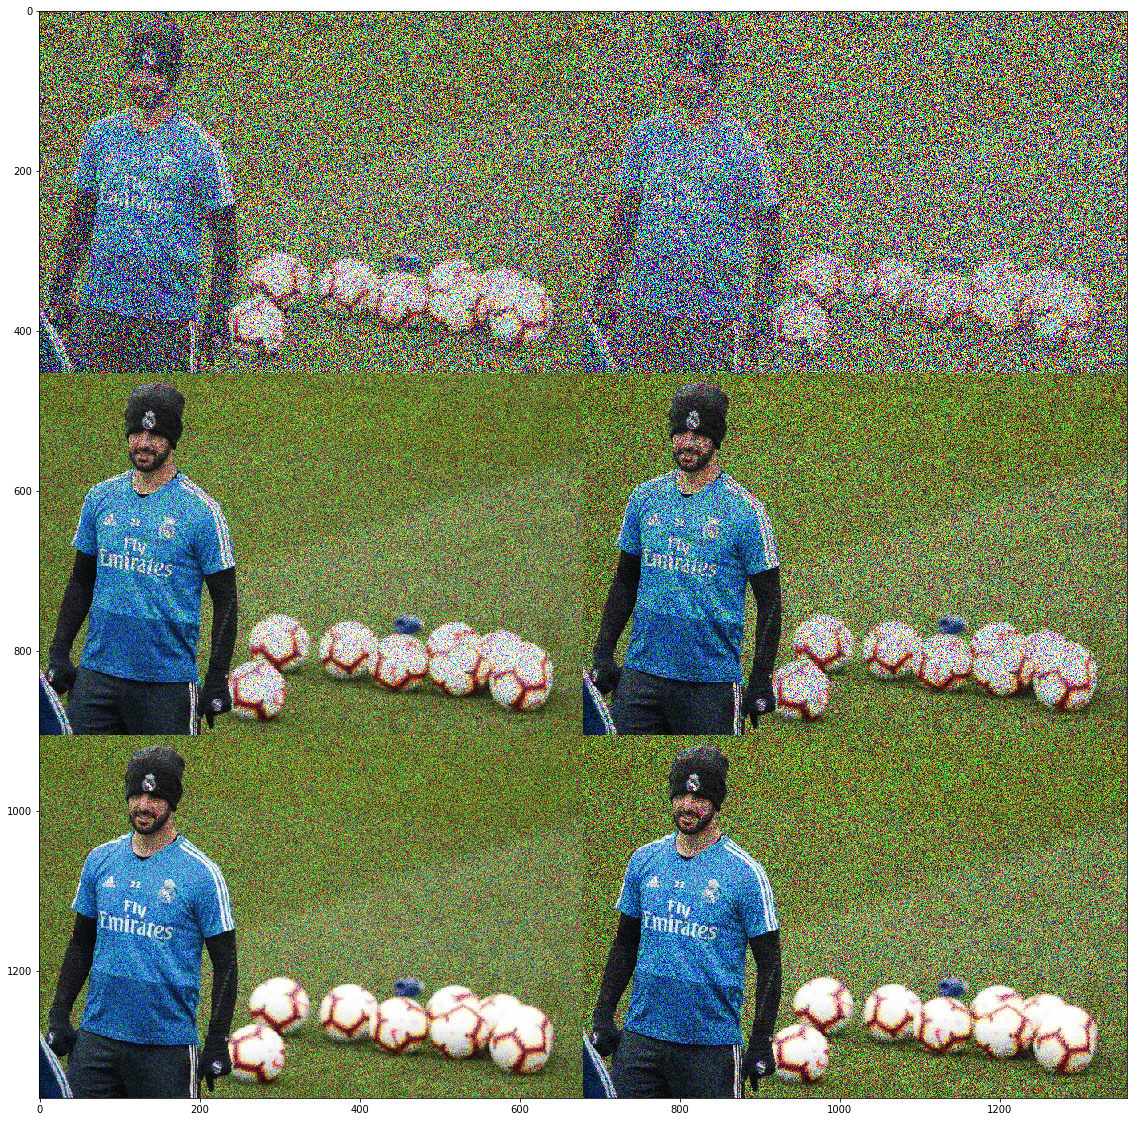

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/gdrive/My Drive/examples/isco_gorro.jpg")[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.6),0,1)
noisy2 = np.clip((img + noise),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.4)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.6)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.4)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.6)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.6)), (1-img2+1)*(1 + noise*0.6)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()

In [0]:
import argparse
import pickle
import cv2

# Carga de las codificaciones de imágenes conocidas
print("Carga de codificaciones...")
data = pickle.loads(open("/content/gdrive/My Drive/encodings.pickle", "rb").read())
 
# Carga de la imagen y conversion de BGR a RGB

# Prueba 1
#imagen = noisy

# Prueba 2
imagen = noisy2

# Prueba 3
#imagen = noisy2mul

# Prueba 4
#imagen = noisy4mul


#rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 
# Detección de las coordinadas X e Y de las cajas que enmarcan la cara de una imagen mediante el uso del modelo CNN
print("Reconociendo caras...")
cajas = face_recognition.face_locations(rgb, model='cnn')
encodings = face_recognition.face_encodings(rgb, cajas)
# Inicialización de la lista para almacenamiento de las imágenes detectadas
nombres = []

# Bucle sobre las codificaciones de imágenes
for encoding in encodings:
	# Comparación de las imágenes conocidas frente a la imágen input
	coincidencias = face_recognition.compare_faces(data["encodings"], encoding)
	nombre = "Desconocido"
  
  # Comprobación para ver si existe coincidencia
	if True in coincidencias:
		# Se contabilizan el número de coincidencias por cara
		matchedIdxs = [i for (i, b) in enumerate(coincidencias) if b]
		counts = {}
 
		# Se actualiza el contador de cada cara reconocida
		for i in matchedIdxs:
			nombre = data["names"][i]
			counts[nombre] = counts.get(nombre, 0) + 1
 
		# Se determina que la cara reconocida es aquella con mayor número de votos
		nombre = max(counts, key=counts.get)
	
	# Se actualiza la lista final con los nombres de las imágenes
	nombres.append(nombre)

Carga de codificaciones...
Reconociendo caras...
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


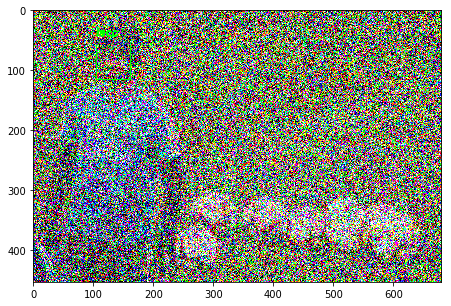

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

# Bucle sobre las caras reconocidas
for ((top, right, bottom, left), nombre) in zip(cajas, nombres):
	# Se dibuja el nombre sobre la imagen
	cv2.rectangle(imagen, (left, top), (right, bottom), (0, 255, 0), 1)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(imagen, nombre, (left, y), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0, 255, 0), 2)
 
plt.figure(figsize = (200,5))
plt.imshow(imagen)
plt.show()

3) Pruebas con fotos de hermanos gemelos

In [0]:
import argparse
import pickle
import cv2

# Carga de las codificaciones de imágenes conocidas
print("Carga de codificaciones...")
data = pickle.loads(open("/content/gdrive/My Drive/encodings.pickle", "rb").read())
 
# Carga de la imagen y conversion de BGR a RGB

# Prueba 1
imagen = cv2.imread("/content/gdrive/My Drive/examples/boer2.jpg")

rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 
# Detección de las coordinadas X e Y de las cajas que enmarcan la cara de una imagen mediante el uso del modelo CNN
print("Reconociendo caras...")
cajas = face_recognition.face_locations(rgb, model='cnn')
encodings = face_recognition.face_encodings(rgb, cajas)
# Inicialización de la lista para almacenamiento de las imágenes detectadas
nombres = []

# Bucle sobre las codificaciones de imágenes
for encoding in encodings:
	# Comparación de las imágenes conocidas frente a la imágen input
	coincidencias = face_recognition.compare_faces(data["encodings"], encoding)
	nombre = "Desconocido"
  
  # Comprobación para ver si existe coincidencia
	if True in coincidencias:
		# Se contabilizan el número de coincidencias por cara
		matchedIdxs = [i for (i, b) in enumerate(coincidencias) if b]
		counts = {}
 
		# Se actualiza el contador de cada cara reconocida
		for i in matchedIdxs:
			nombre = data["names"][i]
			counts[nombre] = counts.get(nombre, 0) + 1
 
		# Se determina que la cara reconocida es aquella con mayor número de votos
		nombre = max(counts, key=counts.get)
	
	# Se actualiza la lista final con los nombres de las imágenes
	nombres.append(nombre)

Carga de codificaciones...
Reconociendo caras...


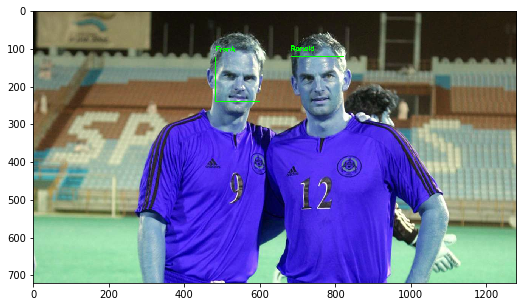

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

# Bucle sobre las caras reconocidas
for ((top, right, bottom, left), nombre) in zip(cajas, nombres):
	# Se dibuja el nombre sobre la imagen
	cv2.rectangle(imagen, (left, top), (right, bottom), (0, 255, 0), 1)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(imagen, nombre, (left, y), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0, 255, 0), 2)
 
plt.figure(figsize = (200,5))
plt.imshow(imagen)
plt.show()

**Pruebas fotos personales**

Por último, se van a realizar pruebas con fotos mías personales para demostrar que el modelo no funciona únicamente con fotos de personas famosas.

In [6]:
import argparse
import pickle
import cv2

# Carga de las codificaciones de imágenes conocidas
print("Carga de codificaciones...")
data = pickle.loads(open("/content/gdrive/My Drive/encodings.pickle", "rb").read())
 
# Carga de la imagen y conversion de BGR a RGB

# Prueba 1
#imagen = cv2.imread("/content/gdrive/My Drive/examples/borja1.jpg")

# Prueba 2
imagen = cv2.imread("/content/gdrive/My Drive/examples/borja2.jpg")

# Prueba 3
#imagen = cv2.imread("/content/gdrive/My Drive/examples/borja3.jpg")

rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 
# Detección de las coordinadas X e Y de las cajas que enmarcan la cara de una imagen mediante el uso del modelo CNN
print("Reconociendo caras...")
cajas = face_recognition.face_locations(rgb, model='cnn')
encodings = face_recognition.face_encodings(rgb, cajas)
# Inicialización de la lista para almacenamiento de las imágenes detectadas
nombres = []

# Bucle sobre las codificaciones de imágenes
for encoding in encodings:
	# Comparación de las imágenes conocidas frente a la imágen input
	coincidencias = face_recognition.compare_faces(data["encodings"], encoding)
	nombre = "Desconocido"
  
  # Comprobación para ver si existe coincidencia
	if True in coincidencias:
		# Se contabilizan el número de coincidencias por cara
		matchedIdxs = [i for (i, b) in enumerate(coincidencias) if b]
		counts = {}
 
		# Se actualiza el contador de cada cara reconocida
		for i in matchedIdxs:
			nombre = data["names"][i]
			counts[nombre] = counts.get(nombre, 0) + 1
 
		# Se determina que la cara reconocida es aquella con mayor número de votos
		nombre = max(counts, key=counts.get)
	
	# Se actualiza la lista final con los nombres de las imágenes
	nombres.append(nombre)

Carga de codificaciones...
Reconociendo caras...


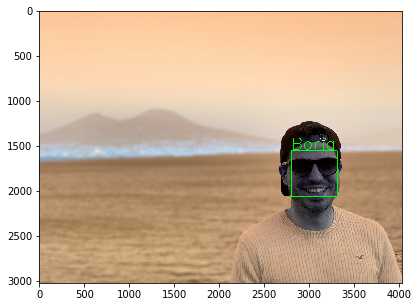

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

# Bucle sobre las caras reconocidas
for ((top, right, bottom, left), nombre) in zip(cajas, nombres):
	# draw the predicted face name on the image
	cv2.rectangle(imagen, (left, top), (right, bottom), (0, 255, 0), 7)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(imagen, nombre, (left, y), cv2.FONT_HERSHEY_SIMPLEX,6, (0, 255, 0), 7)
 
plt.figure(figsize = (200,5))
plt.imshow(imagen)
plt.show()

In [41]:
from PIL import Image
import imagehash
import datetime
import json

hash_img = imagehash.average_hash(Image.open('/content/gdrive/My Drive/examples/borja2.jpg'))
etiqueta = nombres[0]
task = {"$class": "org.basic.identificacion.FacialRecognition","registro": "org.basic.identificacion.Registro#REG_001", "fecha": str(datetime.datetime.now()),"etiqueta": etiqueta,"hash_imagen":str(hash_img)}


# Almacenamiento de las codificaciones de la imagenes en Google Drive
print("Almacenando identificacion...")
f = open("/content/gdrive/My Drive/identificacion.json", "w")
f.write(json.dumps(task))
f.close()

Almacenando identificacion...


**Detección de objetos**

In [0]:
import argparse
import pickle
import cv2

# Carga de las codificaciones de imágenes conocidas
print("Carga de codificaciones...")
data = pickle.loads(open("/content/gdrive/My Drive/encodings.pickle", "rb").read())
 
# Carga de la imagen y conversion de BGR a RGB

imagen = cv2.imread("/content/gdrive/My Drive/examples/habitacion.jpg")

rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 
# Detección de las coordinadas X e Y de las cajas que enmarcan la cara de una imagen mediante el uso del modelo CNN
print("Reconociendo caras...")
cajas = face_recognition.face_locations(rgb, model='cnn')
encodings = face_recognition.face_encodings(rgb, cajas)
# Inicialización de la lista para almacenamiento de las imágenes detectadas
nombres = []

# Bucle sobre las codificaciones de imágenes
for encoding in encodings:
	# Comparación de las imágenes conocidas frente a la imágen input
	coincidencias = face_recognition.compare_faces(data["encodings"], encoding)
	nombre = "Desconocido"
  
  # Comprobación para ver si existe coincidencia
	if True in coincidencias:
		# Se contabilizan el número de coincidencias por cara
		matchedIdxs = [i for (i, b) in enumerate(coincidencias) if b]
		counts = {}
 
		# Se actualiza el contador de cada cara reconocida
		for i in matchedIdxs:
			nombre = data["names"][i]
			counts[nombre] = counts.get(nombre, 0) + 1
 
		# Se determina que la cara reconocida es aquella con mayor número de votos
		nombre = max(counts, key=counts.get)
	
	# Se actualiza la lista final con los nombres de las imágenes
	nombres.append(nombre)
	print(nombres)

Carga de codificaciones...
Reconociendo caras...


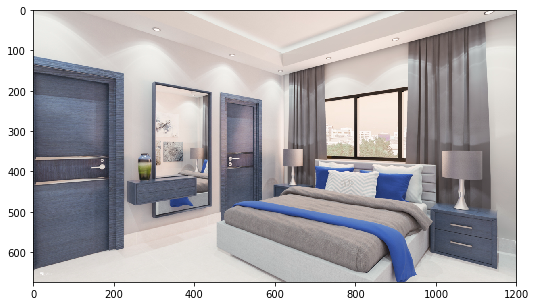

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

# Bucle sobre las caras reconocidas
for ((top, right, bottom, left), nombre) in zip(cajas, nombres):
	# draw the predicted face name on the image
	cv2.rectangle(imagen, (left, top), (right, bottom), (0, 255, 0), 7)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(imagen, nombre, (left, y), cv2.FONT_HERSHEY_SIMPLEX,6, (0, 255, 0), 7)
 
plt.figure(figsize = (200,5))
plt.imshow(imagen)
plt.show()